# Load Data

In this project, we will be working with Uber and Lyft data. The data can be found here:

https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

# Data Cleaning

In [725]:
import pandas as pd

uber_data = pd.read_csv(r"rideshare_kaggle.csv")

In [727]:
uber_data['name'].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

In [728]:
uber_data['name'].nunique()

13

In [608]:
uber_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [734]:
extra_cols = [ 'product_id','timezone','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability','apparentTemperature', 'precipIntensity' ,
'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'
]

uber_data = uber_data.drop(extra_cols, axis=1)              

In [624]:
uber_data.shape

(693071, 13)

In [626]:
uber_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier'],
      dtype='object')

In [628]:
uber_data.to_csv(r'data.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 


In [629]:
uber_dataset = pd.read_csv(r"data.csv")
uber_dataset

,Unnamed: 0,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Taxi,NaN,1.00,1.0
693069,693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [385]:
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322844 entries, 0 to 322843
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        322844 non-null  int64  
 1   id                322844 non-null  object 
 2   timestamp         322844 non-null  float64
 3   hour              322844 non-null  int64  
 4   day               322844 non-null  int64  
 5   month             322844 non-null  int64  
 6   datetime          322844 non-null  object 
 7   source            322844 non-null  object 
 8   destination       322844 non-null  object 
 9   cab_type          322844 non-null  object 
 10  name              322844 non-null  object 
 11  price             267749 non-null  float64
 12  distance          322844 non-null  float64
 13  surge_multiplier  322844 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 34.5+ MB


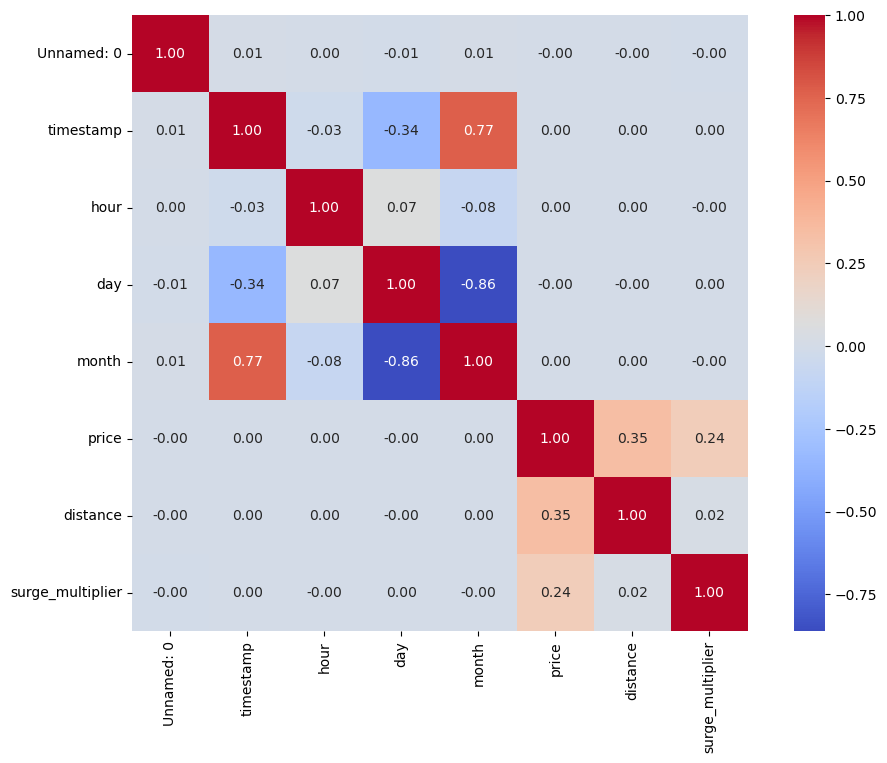

In [631]:
numeric_columns = uber_dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [634]:
uber_dataset.describe()

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier
count,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000
mean,346535.000000,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870
std,200072.508545,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641
min,0.000000,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000
25%,173267.500000,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000
50%,346535.000000,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000
75%,519802.500000,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000
max,693070.000000,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000


In [636]:
print(uber_dataset.isnull().sum())
print(uber_dataset.isnull().sum().sum())
uber_dataset=uber_dataset.dropna()

Unnamed: 0              0
id                      0
timestamp               0
hour                    0
day                     0
month                   0
datetime                0
source                  0
destination             0
cab_type                0
name                    0
price               55095
distance                0
surge_multiplier        0
dtype: int64
55095


In [638]:
uber_dataset.shape

(637976, 14)

In [561]:
object_df = uber_dataset.select_dtypes("object")
object_df

,id,datetime,source,destination,cab_type,name
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux
2,4f9fee41-fde3-4767-bbf1-a00e108701fb,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Shared
3,9043bf77-1d45-4a93-9520-a083e0277f16,2018-11-30 16:13:03,Back Bay,Northeastern University,Lyft,Lux
4,357559cb-8c58-4278-a41a-e33b2e0997a3,2018-12-13 19:15:03,North End,West End,Uber,UberX
...,...,...,...,...,...,...
322838,54362c72-124b-47e8-8d07-62a07cfff624,2018-12-02 05:28:04,Theatre District,Haymarket Square,Uber,UberX
322839,6c1d9207-a9af-431e-a65f-3d9d205f28bf,2018-12-02 05:28:04,Theatre District,Haymarket Square,Uber,Black SUV
322840,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:05,West End,North End,Uber,UberX
322842,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:05,West End,North End,Uber,Black SUV


In [563]:
num_df = uber_dataset.select_dtypes("number")
num_df

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0
2,8,1.543818e+09,6,3,12,3.0,1.08,1.0
3,10,1.543594e+09,16,30,11,13.5,1.08,1.0
4,14,1.544729e+09,19,13,12,7.5,1.11,1.0
...,...,...,...,...,...,...,...,...
322838,693061,1.543728e+09,5,2,12,15.0,1.61,1.0
322839,693063,1.543728e+09,5,2,12,27.0,1.61,1.0
322840,693067,1.543708e+09,23,1,12,9.5,1.00,1.0
322842,693069,1.543708e+09,23,1,12,27.0,1.00,1.0


In [644]:
uber_dataset['name'].nunique()

12

In [ ]:
label_encoder = preprocessing.LabelEncoder() 

In [646]:
uber_dataset['id']= label_encoder.fit_transform(uber_dataset['id']) 
uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime']) 
uber_dataset['destination']= label_encoder.fit_transform(uber_dataset['destination'])
uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type'])
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_61424/55412919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_dataset['id']= label_encoder.fit_transform(uber_dataset['id'])
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_61424/55412919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime'])
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_61424/55412919.py:3: SettingWithCopyWarning: 
A value

In [517]:
uber_dataset.name.values

array([2, 1, 2, ..., 4, 0, 3])

In [647]:
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
0 --> 0
1 --> 1
2 --> 2
3 --> 3
4 --> 4
5 --> 5
6 --> 6
7 --> 7
8 --> 8
9 --> 9
10 --> 10
11 --> 11


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_61424/3050042265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])


In [650]:
uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_61424/2031607526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])


In [652]:
uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type'])

print("Class mapping of Cab: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cab: 
0 --> 0
1 --> 1


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_61424/2725648771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type'])


In [654]:
uber_dataset.dtypes

Unnamed: 0            int64
id                    int64
timestamp           float64
hour                  int64
day                   int64
month                 int64
datetime              int64
source                int64
destination           int64
cab_type              int64
name                  int64
price               float64
distance            float64
surge_multiplier    float64
dtype: object

In [413]:
uber_dataset.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,0,69493,1.544953e+09,9,16,12,25277,5,7,0,2,5.0,0.44,1.0
1,1,79453,1.543284e+09,2,27,11,956,5,7,0,1,11.0,0.44,1.0
2,8,83434,1.543818e+09,6,3,12,14474,0,8,0,2,3.0,1.08,1.0
3,10,150593,1.543594e+09,16,30,11,8141,0,8,0,1,13.5,1.08,1.0
4,14,56009,1.544729e+09,19,13,12,18693,6,11,1,4,7.5,1.11,1.0


In [415]:
uber_dataset.isnull().sum()

Unnamed: 0          0
id                  0
timestamp           0
hour                0
day                 0
month               0
datetime            0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
dtype: int64

# Normalization & Feature Selection

In [656]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [658]:
feature = uber_dataset.drop(columns = ['id', 'timestamp', 'hour', 'day', 'month', 'datetime','price','source', 'destination','Unnamed: 0'], axis = 1)
target = uber_dataset['price']

In [660]:
feature.shape

(637976, 4)

In [662]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

In [664]:
X_train.head()

,cab_type,name,distance,surge_multiplier
141913,1,9,2.22,1.0
207434,0,4,3.22,1.0
524847,1,1,1.63,1.0
629294,0,2,0.61,1.0
5225,1,9,3.42,1.0


In [666]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [668]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [670]:
X_train_norm

array([[1.        , 0.81818182, 0.28061224, 0.        ],
       [0.        , 0.36363636, 0.40816327, 0.        ],
       [1.        , 0.09090909, 0.20535714, 0.        ],
       ...,
       [1.        , 0.81818182, 0.13903061, 0.        ],
       [0.        , 0.63636364, 0.08035714, 0.        ],
       [0.        , 0.54545455, 0.29591837, 0.25      ]])

In [672]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=3)

In [674]:
pred = knn.predict(X_test_norm)
pred

array([ 6.83333333, 10.66666667,  7.        , ..., 15.33333333,
        8.83333333, 11.66666667])

In [676]:
y_test.values

array([ 7. , 10.5,  7. , ..., 18. , 10. , 11. ])

In [678]:
knn.score(X_test_norm, y_test)

0.9545963025995535

## Linear Regression

In [680]:
lin_reg = LinearRegression()

In [682]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [684]:
pred = lin_reg.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test, y_test))

MAE 5.158821252148203
RMSE 6.490771426641877
R2 score 0.5167479984922835


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Decision Tree

In [686]:
tree = DecisionTreeRegressor(max_depth=10)

In [688]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [690]:
X_train_norm

array([[1.        , 0.81818182, 0.28061224, 0.        ],
       [0.        , 0.36363636, 0.40816327, 0.        ],
       [1.        , 0.09090909, 0.20535714, 0.        ],
       ...,
       [1.        , 0.81818182, 0.13903061, 0.        ],
       [0.        , 0.63636364, 0.08035714, 0.        ],
       [0.        , 0.54545455, 0.29591837, 0.25      ]])

In [692]:
y_test

526491     7.0
506474    10.5
139551     7.0
235222    15.5
140436    16.5
          ... 
87288     33.0
111342     7.0
201635    18.0
320604    10.0
666972    11.0
Name: price, Length: 127596, dtype: float64

In [696]:
pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 1.1574343010549002
RMSE 1.7532316734227154
R2 score 0.9647418398640222


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [698]:
tree_importance = {feature: importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance

{'cab_type': 0.025726500058841844,
 'name': 0.7811487616733434,
 'distance': 0.1512189262125124,
 'surge_multiplier': 0.04190581205530238}

In [700]:
from sklearn.tree import export_text
tree_viz = export_text(tree, feature_names=list(X_train.columns))
print(tree_viz)

|--- name <= 0.41
|   |--- distance <= 0.32
|   |   |--- name <= 0.32
|   |   |   |--- cab_type <= 0.50
|   |   |   |   |--- name <= 0.23
|   |   |   |   |   |--- distance <= 0.19
|   |   |   |   |   |   |--- surge_multiplier <= 0.19
|   |   |   |   |   |   |   |--- distance <= 0.12
|   |   |   |   |   |   |   |   |--- surge_multiplier <= 0.06
|   |   |   |   |   |   |   |   |   |--- distance <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [10.86]
|   |   |   |   |   |   |   |   |   |--- distance >  0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [11.84]
|   |   |   |   |   |   |   |   |--- surge_multiplier >  0.06
|   |   |   |   |   |   |   |   |   |--- distance <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [13.50]
|   |   |   |   |   |   |   |   |   |--- distance >  0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [13.58]
|   |   |   |   |   |   |   |--- distance >  0.12
|   |   |   |   |   |   |   |   |--- surge_multiplier <= 0.06
|   |   

In [718]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_norm, y_train)

# Export the tree visualization to DOT format
dot_data = export_graphviz(
    tree,
    out_file=None,  # Use None to return the DOT data as a string
    filled=True,
    rounded=True,
    feature_names=X_train.columns  # Ensure you use the original DataFrame for feature names
)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Save the tree as a PNG file
graph.render("decision_tree", format="png", cleanup=True)  # Saves as decision_tree.png


'decision_tree.png'

In [710]:
X_train_norm_df.name.value_counts()

name
0.727273    44136
0.090909    44130
0.000000    44076
0.909091    44032
0.818182    43987
1.000000    43950
0.454545    41141
0.181818    41054
0.363636    41052
0.545455    41031
0.636364    40934
0.272727    40857
Name: count, dtype: int64

In [712]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm_df

,cab_type,name,distance,surge_multiplier
0,1.0,0.818182,0.280612,0.00
1,0.0,0.363636,0.408163,0.00
2,1.0,0.090909,0.205357,0.00
3,0.0,0.181818,0.075255,0.00
4,1.0,0.818182,0.433673,0.00
...,...,...,...,...
510375,0.0,0.363636,0.438776,0.00
510376,0.0,0.363636,0.267857,0.00
510377,1.0,0.818182,0.139031,0.00
510378,0.0,0.636364,0.080357,0.00
